<a href="https://colab.research.google.com/github/bibekebib/The-worst-DL-model-/blob/main/Yoga_pose_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bibekchalise","key":"c490de08c1db7e82c7f0e9885082d925"}'}

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d shrutisaxena/yoga-pose-image-classification-dataset

 99% 993M/0.98G [00:08<00:00, 126MB/s]
100% 0.98G/0.98G [00:08<00:00, 125MB/s]


In [7]:
!ls

kaggle.json  sample_data  yoga-pose-image-classification-dataset.zip


In [8]:
!unzip yoga-pose-image-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/bharadvajasana i/11-1.png  
  inflating: dataset/bharadvajasana i/14-0.png  
  inflating: dataset/bharadvajasana i/15-0.png  
  inflating: dataset/bharadvajasana i/18-0.png  
  inflating: dataset/bharadvajasana i/18-1.png  
  inflating: dataset/bharadvajasana i/19-0.png  
  inflating: dataset/bharadvajasana i/2-0.png  
  inflating: dataset/bharadvajasana i/20-0.png  
  inflating: dataset/bharadvajasana i/21-0.png  
  inflating: dataset/bharadvajasana i/22-0.png  
  inflating: dataset/bharadvajasana i/23-0.png  
  inflating: dataset/bharadvajasana i/24-0.png  
  inflating: dataset/bharadvajasana i/26-0.png  
  inflating: dataset/bharadvajasana i/28-0.png  
  inflating: dataset/bharadvajasana i/29-0.png  
  inflating: dataset/bharadvajasana i/3-0.png  
  inflating: dataset/bharadvajasana i/30-0.png  
  inflating: dataset/bharadvajasana i/31-0.png  
  inflating: dataset/bharadvajasana i/32-0.png  
  inflating: dataset

In [1]:
import glob

In [2]:
root_path = '/content/dataset'
dataset = glob.glob(root_path+'/*/*')

# dataset

In [3]:
each_label = [dataset[i].split('/')[3] for i in range(len(dataset))]
# each_label

In [4]:
labels = glob.glob(root_path+'/*')

In [5]:
tot  = [labels.split('/content/dataset') for labels in labels]


In [6]:

fin_labels = [(tot[i][1]).replace('/','') for i in range(len(tot))]
len(fin_labels)
fin_labels[23]

'virabhadrasana i'

In [7]:
import pandas as pd
total_dataset1 = pd.DataFrame(dataset, columns=['image'])
total_dataset2 = pd.DataFrame(each_label,columns=['label'])

In [8]:
# total_dataset1.head(100)

In [9]:
# total_dataset2.head(100)

In [10]:
df = pd.merge(total_dataset1, total_dataset2, left_index= True, right_index= True)

In [11]:
df.isnull().sum()

image    0
label    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


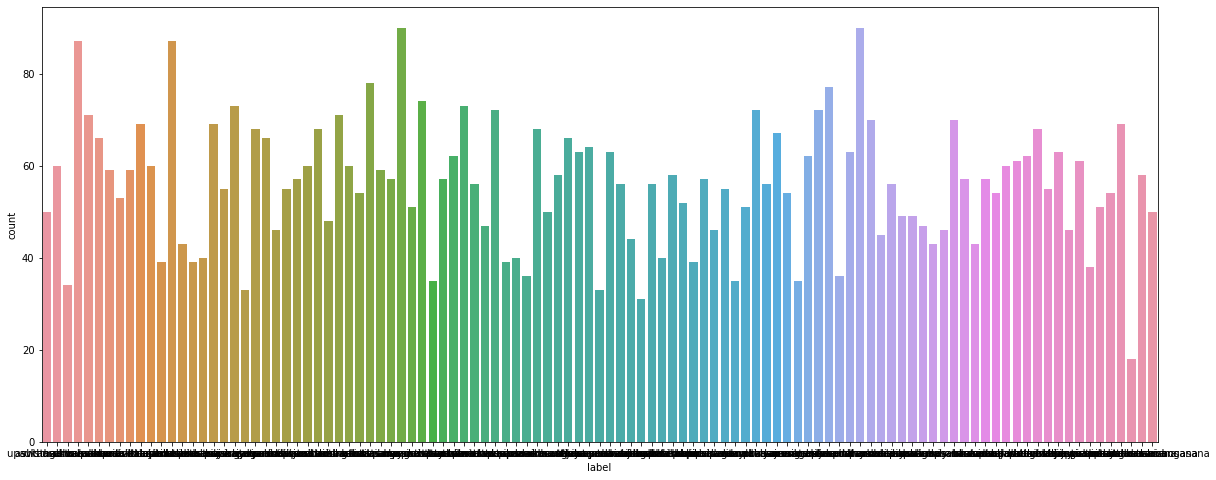

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[20,8])
sns.countplot(df['label'])
plt.show()

In [13]:
import cv2
# img = cv2.imread('/content/dataset/supta padangusthasana/24-0.png')
# img

In [14]:
from cv2 import cv2
import numpy as np
import matplotlib.pyplot as plt

# for img_path, label in df.values:

#   try:

#     img = cv2.imread(img_path)
#     img = cv2.resize(img, (196,196))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = img/255.0
#     img = np.reshape(img, (196,196,1))
 
#   except Exception as e:
#     print(img_path)
  

In [15]:
df.loc[df['image']=='/content/dataset/virabhadrasana ii/File36.gif']


,image,label
3352,/content/dataset/virabhadrasana ii/File36.gif,virabhadrasana ii


In [16]:
df.loc[df['image']=='/content/dataset/virabhadrasana i/File62.gif']

,image,label
1350,/content/dataset/virabhadrasana i/File62.gif,virabhadrasana i


In [17]:
df = df.drop(index=[3352,1350])

In [18]:
# from torchvision import transforms
# from torchvision.utils import make_grid
# import torch
# import tensorflow as tf
# for images, labels in df.values:
#     fig, ax = plt.subplots(figsize=(12, 6))
#     ax.set_xticks([]); ax.set_yticks([])
#     img = cv2.imread(img_path)
#     img = cv2.resize(img, (196,196))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = tf.convert_to_tensor(img, dtype=tf.float32)
#     img = img.numpy()
#     img = torch.from_numpy(img)
#     ax.imshow(make_grid(img, nrow=16).permute(1, 2, 0))
    
        
        


In [19]:


def process_image(img_path):

  try:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (196,196))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (196,196,1))
    return img
    
  except Exception as e:
        print(e)
  
import numpy as np

def compose_dataset(df):

  try:
    data=[]
    labels = []
    for img_path, label in df.values:
        data.append(process_image(img_path))
        labels.append(label)
    
    return (np.asarray(data, dtype=float), np.array(labels, dtype=object))  
  
  except Exception as e:
    print(e)
  # print(type(data))



   

In [20]:
X,y = compose_dataset(df)

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)
y

array([75, 75, 75, ..., 91, 91, 91])

In [22]:
print('dataset shape: {}, Labels shape {} '.format(X.shape,y.shape ))

dataset shape: (5992, 196, 196, 1), Labels shape (5992,) 


In [23]:
print('dataset shape: {}, Labels shape {} '.format(X.shape,y.shape ))

dataset shape: (5992, 196, 196, 1), Labels shape (5992,) 


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [25]:
XX,  X_test,yy, y_test = train_test_split(X,y, test_size=0.2,shuffle=True, random_state=42, stratify=y)

In [26]:
print('dataset shape: {}, Labels shape {} '.format(XX.shape,yy.shape ))
print('dataset shape: {}, Labels shape {} '.format(X_test.shape,y_test.shape ))

dataset shape: (4793, 196, 196, 1), Labels shape (4793,) 
dataset shape: (1199, 196, 196, 1), Labels shape (1199,) 


In [27]:
X_train, X_val, y_train, y_val = train_test_split(XX, yy, shuffle=True, test_size=0.2, random_state=42, stratify=yy)

In [28]:
ii =  y_train.tolist()
jj = y_val.tolist()
kk = y_test.tolist()

In [29]:

def get_unique_numbers(numbers):

    list_of_unique_numbers = []

    unique_numbers = set(numbers)

    for number in unique_numbers:
        list_of_unique_numbers.append(number)

    return list_of_unique_numbers
print(len(get_unique_numbers(ii)),len(get_unique_numbers(jj)),len(get_unique_numbers(kk)))

107 107 107


In [30]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
datagen.fit(X_train)

In [31]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


In [32]:
#merai model thik
import tensorflow as tf
from tensorflow import keras 
model = keras.models.Sequential(
[   keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding='same', activation='relu', input_shape = (196,196,1)),
    keras.layers.Conv2D(filters=8, kernel_size =(7,7), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1028, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(107, activation='softmax')]
)

optimizer = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [65]:
# This model also sucks
# from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Conv2D
# # covnet
# model = tf.keras.models.Sequential([Conv2D(128,(3,3),input_shape=(196,196,1),activation='relu'),
#                                    Conv2D(128,(3,3)),
#                                    MaxPool2D(2,2),
#                                    Conv2D(64,(3,3)),
#                                    Conv2D(64,(3,3)),
#                                    MaxPool2D(2,2),
#                                    Conv2D(32,(3,3)),
#                                    Conv2D(32,(3,3)),
#                                    MaxPool2D(2,2),
#                                    Flatten(),
#                                    Dense(1024,activation='relu'),
#                                    Dense(512,activation='relu'),
#                                    Dense(107,activation='softmax')])
# optimizer = tf.keras.optimizers.Adam()
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
callback = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(datagen.flow(X_train, y_train, batch_size=4), validation_data=(X_test, y_test), epochs=25, verbose=1, callbacks=[callback])

Epoch 1/25
959/959 [==============================] - 41s 31ms/step - loss: 4.6690 - accuracy: 0.0130 - val_loss: 4.6518 - val_accuracy: 0.0150
Epoch 2/25
959/959 [==============================] - 28s 30ms/step - loss: 4.6560 - accuracy: 0.0141 - val_loss: 4.6447 - val_accuracy: 0.0150
Epoch 3/25
959/959 [==============================] - 29s 30ms/step - loss: 4.6524 - accuracy: 0.0138 - val_loss: 4.6458 - val_accuracy: 0.0150
Epoch 4/25
959/959 [==============================] - 29s 30ms/step - loss: 4.6515 - accuracy: 0.0120 - val_loss: 4.6452 - val_accuracy: 0.0150
Epoch 5/25
959/959 [==============================] - 29s 30ms/step - loss: 4.6506 - accuracy: 0.0128 - val_loss: 4.6448 - val_accuracy: 0.0150


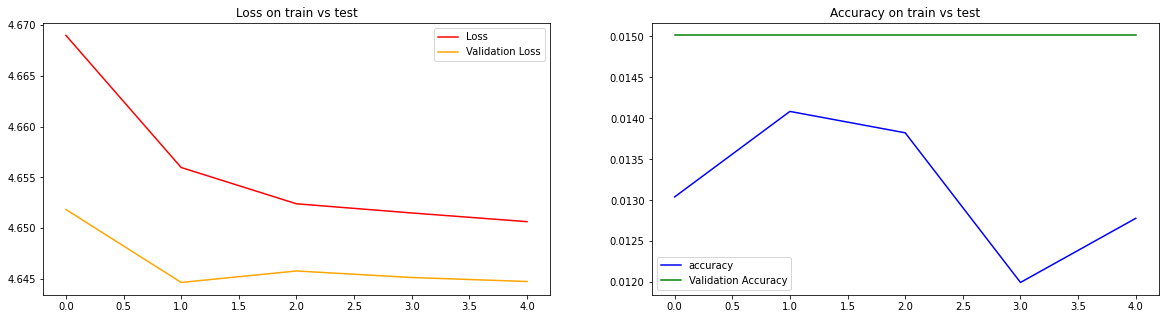

In [34]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=history.epoch, y=history.history['loss'], color='red', label='Loss')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='orange', label='Validation Loss')
plt.title('Loss on train vs test')
plt.legend(loc='best')

plt.subplot(1,2,2)
sns.lineplot(x=history.epoch, y=history.history['accuracy'], color='blue', label='accuracy')
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.title('Accuracy on train vs test')
plt.legend(loc='best')
plt.show()


In [35]:
from sklearn.metrics import classification_report, confusion_matrix
y_test_hat = model.predict(X_test, batch_size=4)
y_test_hat = np.argmax(y_test_hat, axis=1)
y_test = np.argmax(y_test, axis=1)
conf_m = confusion_matrix(y_test, y_test_hat)
clas_r = classification_report(y_test, y_test_hat)

# plot confusion matrix as heatmap

# print classification report
print('Classification report on test data')
print(clas_r)

Classification report on test data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        14
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
y_val_hat = model.predict(X_val, batch_size=4)
y_val_hat = np.argmax(y_val_hat, axis=1)
y_val = np.argmax(y_val, axis=1)

ValueError: ignored

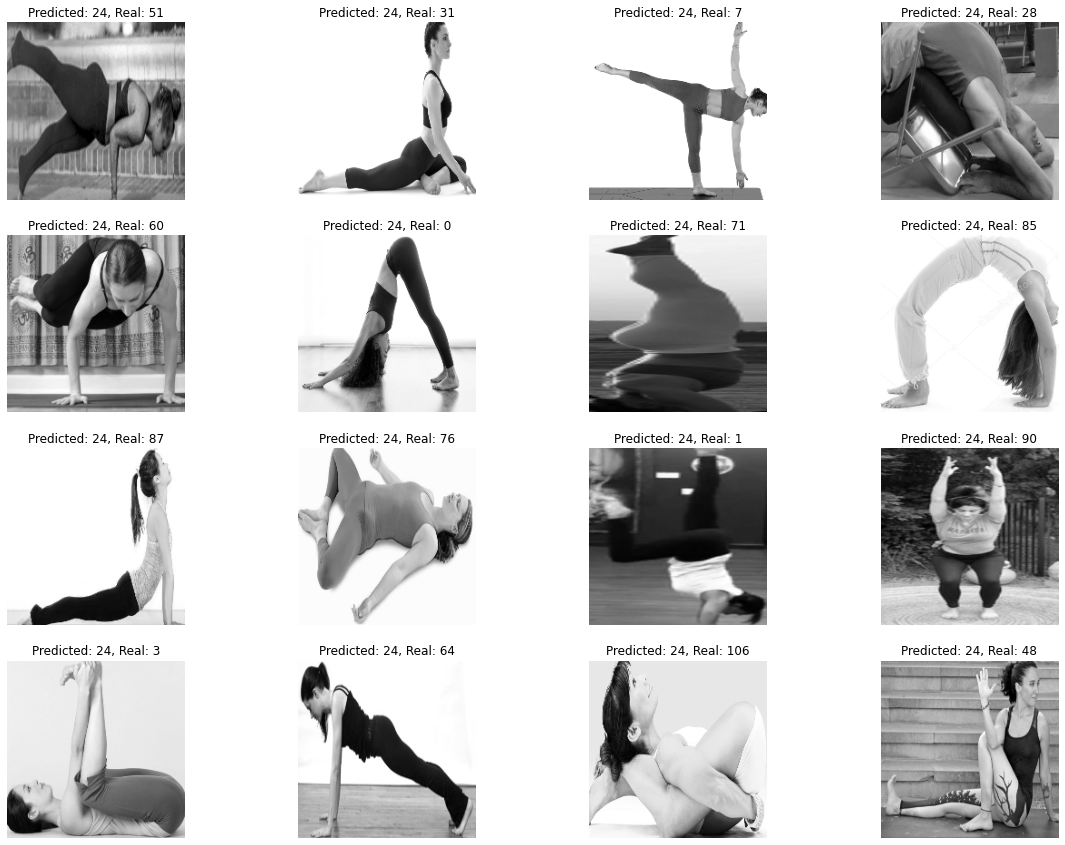

In [37]:
plt.figure(figsize=(20,15))
for i,x in enumerate(X_val):
    plt.subplot(4,4,i+1)
    plt.imshow(x.reshape(196, 196), cmap='gray')
    plt.axis('off')
    plt.title('Predicted: {}, Real: {}'.format(y_val_hat[i], y_val[i]))  